In [77]:
import pandas as pd

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

class TensorFactorModel(keras.Model):
    def __init__(self, r):
        super(TensorFactorModel, self).__init__()
        self.ut = keras.layers.Dense(r, activation='linear')
        self.vn = keras.layers.Dense(r, activation='linear')
        self.wd = keras.layers.Dense(r, activation='linear')

    def call(self, inputs):
        t, n, d = inputs
        ut = self.ut(t[:, tf.newaxis])
        vn = self.vn(n[:, tf.newaxis])
        wd = self.wd(d[:, tf.newaxis])
        return tf.reduce_sum(ut * vn * wd, axis=-1)
'''
In this section, we define two classes: TensorFactorModel and LatentFactorModel. These classes inherit from the keras.Model class, allowing us to define custom models.

The TensorFactorModel class represents the tensor factor model. It has three dense layers (ut, vn, and wd), each with r units and a linear activation function. The call method defines how the model is executed when called with inputs.

The LatentFactorModel class represents the latent factor model. It also has two dense layers (ut and vn), each with r units and a linear activation function. The call method defines how the model is executed when called with inputs.
'''
class LatentFactorModel(keras.Model):
    def __init__(self, r):
        super(LatentFactorModel, self).__init__()
        self.ut = keras.layers.Dense(r, activation='linear')
        self.vn = keras.layers.Dense(r, activation='linear')

    def call(self, inputs):
        t, n, d = inputs
        ut = self.ut(t[:, tf.newaxis])
        vn = self.vn(n[:, tf.newaxis])
        return ut + vn

# Set the dimensions
'''
These variables define the dimensions of the data and the latent factors. 
T, N, and D represent the number of measurements, units, and interventions, respectively. 
r represents the dimension of the latent factors.
'''
T = 50
N = 100
D = 3
r = 2

# Create the models
'''
instances of the TensorFactorModel and LatentFactorModel classes.
'''
tensor_factor_model = TensorFactorModel(r)
latent_factor_model = LatentFactorModel(r)

# Generate potential outcomes
'''
We generate the potential outcomes by passing arrays representing the indices of measurements, units, and interventions to the tensor_factor_model and latent_factor_model.

The np.tile and np.repeat functions are used to repeat the indices appropriately to match the desired shape.

Y represents the predicted outcomes from the tensor factor model.

epsilon is a random noise matrix with shape (N * D, T).

potential_outcomes combines the predicted outcomes from the latent factor model with the random noise.
'''
Y = tensor_factor_model.predict([
    np.tile(np.arange(T), N * D).reshape(N * D, T),
    np.repeat(np.arange(N), D * T).reshape(N * D, T),
    np.tile(np.arange(D), N * T).reshape(N * D, T)
])
epsilon = np.random.randn(N * D, T)
potential_outcomes = latent_factor_model.predict([
    np.tile(np.arange(T), N * D).reshape(N * D, T),
    np.repeat(np.arange(N), D * T).reshape(N * D, T),
    np.tile(np.arange(D), N * T).reshape(N * D, T)
]) + np.expand_dims(epsilon, axis=-1)

# Compute target causal parameter
target_parameter = np.mean(potential_outcomes, axis=-1)
'''
The target causal parameter is calculated as the mean of the potential outcomes along the last dimension.
'''
print("Target Causal Parameter:")
print(target_parameter)


2023-06-18 17:00:02.545867: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 17:00:02.566669: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 3792475000 Hz
2023-06-18 17:00:02.567333: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562f9c28a940 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-06-18 17:00:02.567364: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-06-18 17:00:02.567460: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Target Causal Parameter:
[[  4.8730955    3.78208012   3.37844616 ...   3.10264402   2.4221906
    3.48946415]
 [  3.73059808   5.01529278   3.97093632 ...   3.25618827   4.26355724
    2.64513505]
 [  4.58336698   4.74673887   4.06905952 ...   3.68531849   4.1784889
    4.31781515]
 ...
 [-71.3450276  -71.32018349 -72.69429265 ... -71.52860648 -73.18883051
  -70.51076411]
 [-71.05913776 -71.58101098 -72.71658065 ... -73.11749325 -72.30908074
  -72.96717333]
 [-71.37250698 -71.76821277 -73.24627355 ... -73.1039688  -72.16595172
  -70.63268872]]


In [68]:
import matplotlib.pyplot as plt

# Generate the x-axis values
x = np.arange(T)

# Transpose the target_parameter array
target_parameter_transposed = target_parameter

# # Plot the target parameter for each unit
# # for i in range(N):
# i=1
# plt.plot(x, target_parameter_transposed[i], label=f'Unit {i+1}')

# plt.xlabel('Time Index')
# plt.ylabel('Value')
# plt.title('Target Parameter')
# plt.legend()
# plt.show()


In [78]:
df_parameter_transposed = pd.DataFrame(target_parameter_transposed)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4.873095,3.782080,3.378446,4.570816,4.125633,3.994030,3.699407,2.949051,5.695084,2.969023,...,4.955700,4.612410,4.141560,4.518607,5.288077,1.637988,3.987141,3.102644,2.422191,3.489464
1,3.730598,5.015293,3.970936,4.649485,2.381940,2.499282,4.852702,4.082964,4.855429,2.564877,...,3.744105,1.968854,4.415641,4.134003,4.472603,4.583088,4.596085,3.256188,4.263557,2.645135
2,4.583367,4.746739,4.069060,4.943446,5.291321,3.735669,4.352823,3.520897,6.420001,3.945387,...,4.381594,3.043215,3.665540,3.531040,3.068126,4.252289,4.631005,3.685318,4.178489,4.317815
3,3.397303,2.321046,2.315809,3.281479,4.708197,6.160225,2.893025,3.585150,2.720156,3.713434,...,2.195146,5.203404,4.218893,4.429193,4.000442,4.636772,4.214827,4.021368,2.161432,2.536979
4,3.721169,3.012480,3.046516,2.805199,3.149001,3.678109,3.057982,3.514236,1.969411,2.419790,...,2.786848,3.197129,4.487863,4.281650,3.349093,1.848140,3.615343,1.890781,2.404755,1.866868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-72.309244,-70.069175,-69.963566,-70.925462,-71.738345,-71.876712,-71.083384,-72.517685,-70.184733,-70.189026,...,-70.241293,-70.058241,-70.744310,-71.308117,-72.018809,-72.988900,-69.486668,-70.173839,-72.353309,-71.396375
296,-70.942746,-70.349208,-71.229686,-71.032042,-70.629810,-72.429659,-71.613195,-70.772433,-72.161395,-71.509878,...,-70.692470,-72.331121,-70.093026,-72.560640,-71.563364,-70.515940,-72.868400,-71.831819,-70.609993,-70.947773
297,-71.345028,-71.320183,-72.694293,-71.416233,-72.750897,-72.527344,-72.045674,-71.382343,-70.475082,-72.750738,...,-73.213372,-71.987147,-70.248032,-71.008766,-73.664565,-71.020842,-72.827437,-71.528606,-73.188831,-70.510764
298,-71.059138,-71.581011,-72.716581,-71.783084,-70.967840,-70.485849,-71.007317,-71.986625,-72.644183,-71.831212,...,-71.886413,-71.677821,-71.023177,-72.371018,-72.339232,-70.737318,-71.804020,-73.117493,-72.309081,-72.967173


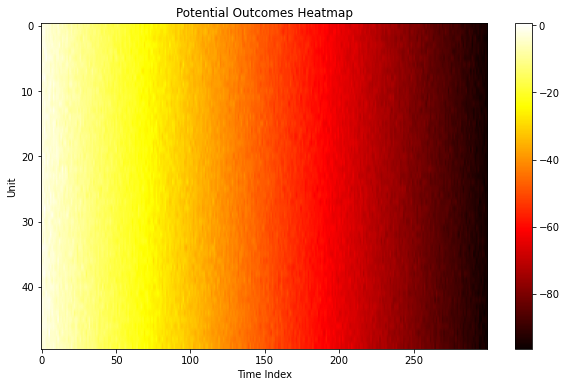

In [15]:
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 6))
potential_outcomes_reshaped = potential_outcomes.transpose(1, 0, 2)
plt.imshow(potential_outcomes_reshaped[:,:,0], cmap='hot', aspect='auto')
plt.colorbar()
plt.title('Potential Outcomes Heatmap')
plt.xlabel('Time Index')
plt.ylabel('Unit')
plt.show()




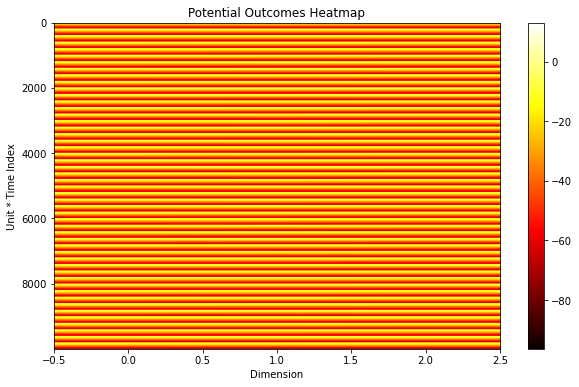

In [53]:
# Heatmap
plt.figure(figsize=(10, 6))
potential_outcomes_reshaped = np.swapaxes(potential_outcomes, 0, 1).reshape(-1, D)
plt.imshow(potential_outcomes_reshaped, cmap='hot', aspect='auto')
plt.colorbar()
plt.title('Potential Outcomes Heatmap')
plt.xlabel('Dimension')
plt.ylabel('Unit * Time Index')
plt.show()

# # Line plots
# plt.figure(figsize=(10, 6))
# for i in range(N):
#     for j in range(D):
#         plt.plot(potential_outcomes[:, i, j], label=f'Unit {i+1}, Dimension {j+1}')
# plt.xlabel('Time Index')
# plt.ylabel('Value')
# plt.title('Potential Outcomes Line Plots')
# plt.legend()
# plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Concatenate potential outcomes along the last axis
concatenated_potential_outcomes = np.concatenate(potential_outcomes, axis=-1)

# # Reshape concatenated potential outcomes into a 2D array
# reshaped_potential_outcomes = np.reshape(concatenated_potential_outcomes, (T, N * D))

# # Calculate the median and standard deviation
# median = np.median(reshaped_potential_outcomes, axis=1)
# std = np.std(reshaped_potential_outcomes, axis=1)

# # Generate the x-axis values
# x = np.arange(T)

# # Plot the median with error bars
# plt.errorbar(x, median, yerr=std, fmt='-o')
# plt.xlabel('Time Index')
# plt.ylabel('Value')
# plt.title('Potential Outcomes')
# plt.show()


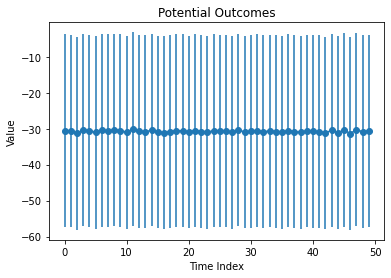

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Concatenate potential outcomes along the second axis
concatenated_potential_outcomes = np.concatenate(potential_outcomes, axis=1)

# Calculate the median and standard deviation
median = np.median(concatenated_potential_outcomes, axis=1)
std = np.std(concatenated_potential_outcomes, axis=1)

# Generate the x-axis values
x = np.arange(T)

# Plot the median with error bars
plt.errorbar(x, median, yerr=std, fmt='-o')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Potential Outcomes')
plt.show()


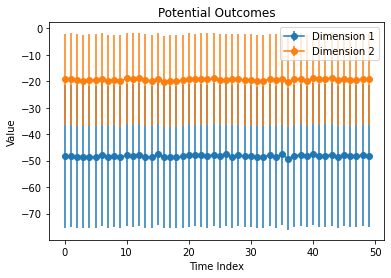

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the median and standard deviation along the time axis
median = np.median(potential_outcomes, axis=0)
std = np.std(potential_outcomes, axis=0)

# Generate the x-axis values
x = np.arange(T)

# Plot the median with error bars
plt.errorbar(x, median[:, 0], yerr=std[:, 0], fmt='-o', label='Dimension 1')
plt.errorbar(x, median[:, 1], yerr=std[:, 1], fmt='-o', label='Dimension 2')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Potential Outcomes')
plt.legend()
plt.show()
